# Loan prediction System 

importing some libraries for EDA 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



Loading Data

In [2]:
df_train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df_test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

Know your data

In [3]:
df_train.shape

(614, 13)

In [4]:
df_test.shape

(367, 12)

In [5]:
df_train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# Data Cleaning and preprocessing

In [9]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [11]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [13]:
#Extractin numerical columns in num_col
num_col = df_train.select_dtypes(exclude='object').columns
print(num_col)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [14]:
#Exdtractin numerical colums in cat_col 
cat_col = df_train.select_dtypes(include=['object','category']).columns
print(cat_col)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [15]:
#Extracting categorial columns of test dataset
cat_col_test = df_test.select_dtypes(include=['object','category']).columns
print(cat_col_test)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')


In [16]:
#filling missing data for numerical values
df_train[num_col] = df_train[num_col].fillna(df_train[num_col].median())
df_test[num_col] = df_test[num_col].fillna(df_test[num_col].median())

In [17]:
#filling ,issing data for categorial values
for col in cat_col:
    mode_val = df_train[col].mode()[0]
    df_train[col] = df_train[col].fillna(mode_val)

for col in cat_col_test:  
    mode_val = df_test[col].mode()[0]
    df_test[col] = df_test[col].fillna(mode_val)


In [18]:
df_train.isnull().sum().sum()

np.int64(0)

In [19]:
df_test.isnull().sum().sum()

np.int64(0)

# EDA

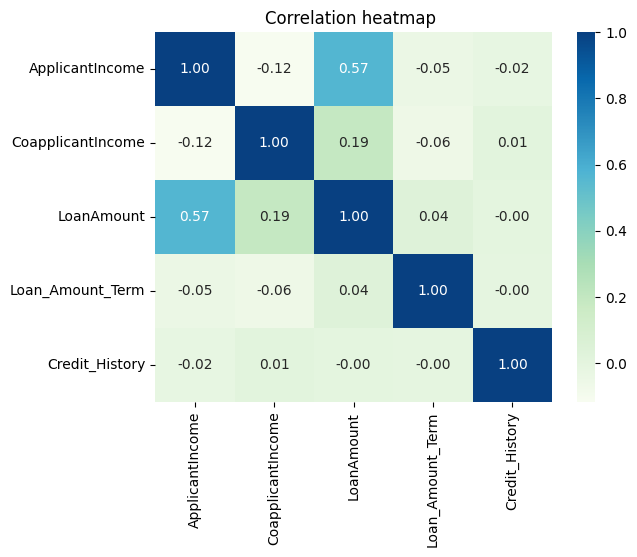

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Selecting numeric values only
df_num = df_train.select_dtypes(include=[np.number])

#Correlation heatmap for all numeric values 
if df_num.shape[1] >= 2:  # if there are more than two columns of number type
    corr =df_num.corr()   # correlation function
    sns.heatmap(corr, annot = True, fmt='.2f',cmap = 'GnBu') #annot 
    plt.title("Correlation heatmap ")
    plt.show()
else:
    print("Not enough columns")
    
    
    


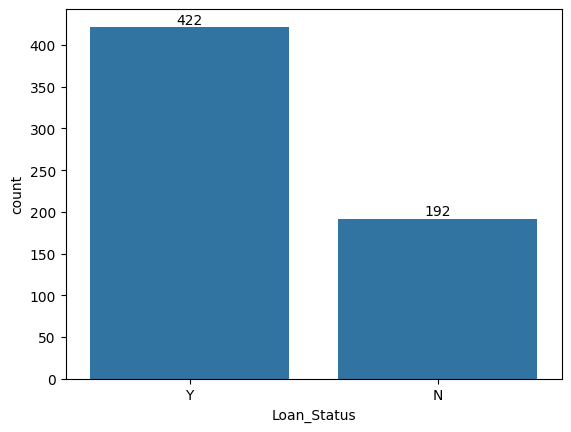

In [29]:
fg = sns.countplot(x=df_train['Loan_Status'])
for x in fg.containers:
    fg.bar_label(x, fmt="%d")
plt.show()

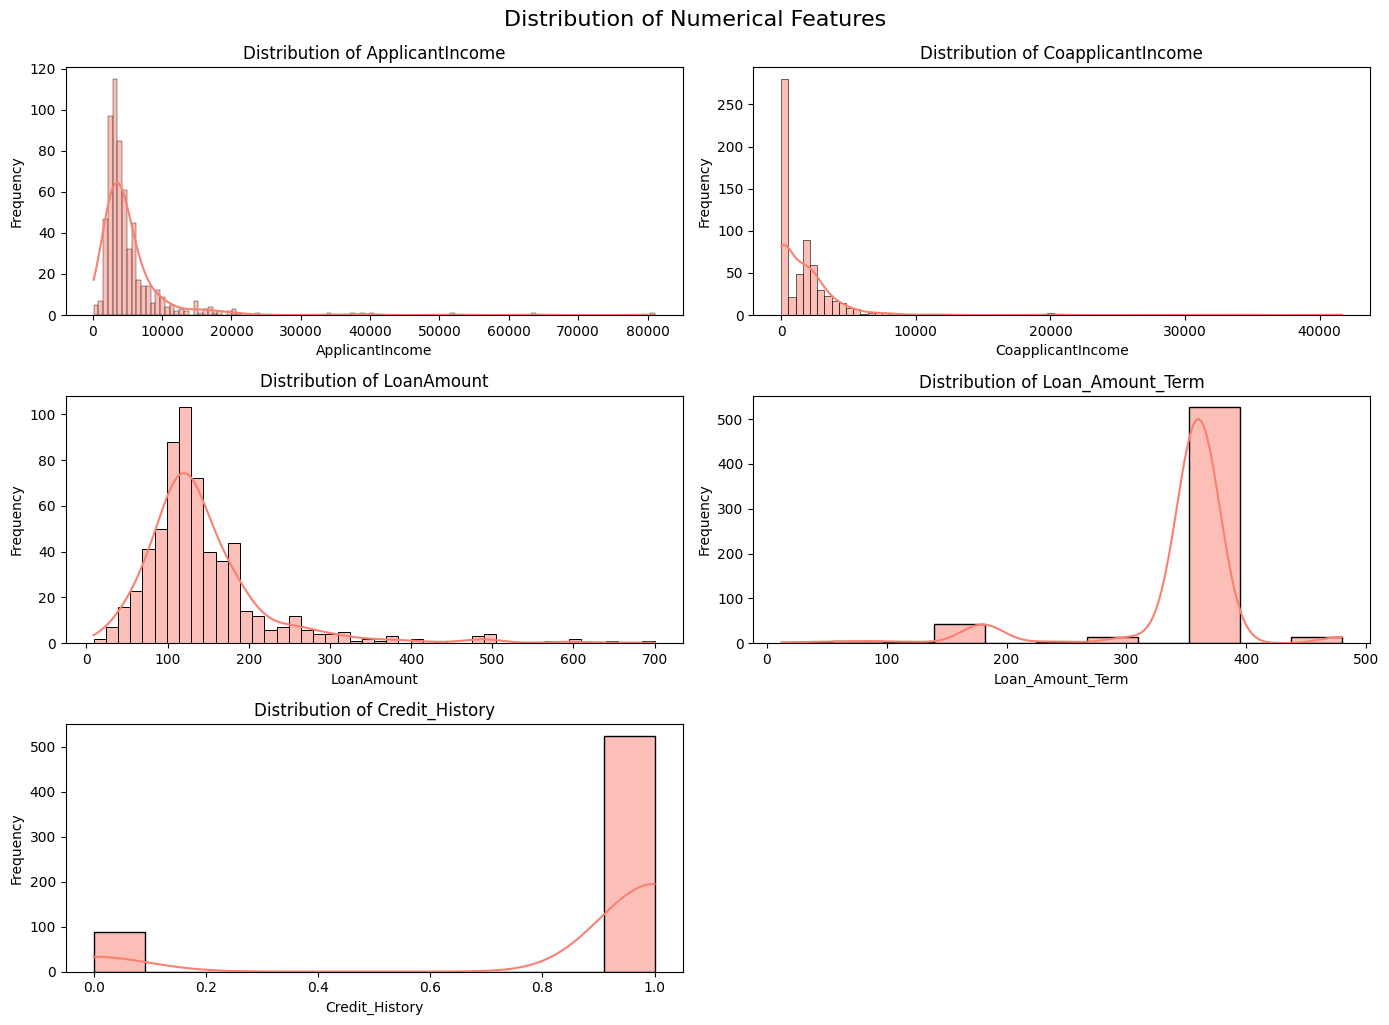

In [32]:

plt.figure(figsize=(14, 10))
for i, col in enumerate(num_col, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_train[col], kde=True, color='salmon')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)
plt.show()


# Feature Engineering  

In [34]:
df_train['TotalIncome'] = df_train['ApplicantIncome']+df_train['CoapplicantIncome']
df_test['TotalIncome'] = df_test['ApplicantIncome']+df_test['CoapplicantIncome']

In [35]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncoome', 'TotalIncome'],
      dtype='object')

In [36]:
df_train.drop('TotalIncoome',axis=1,inplace=True)

In [37]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome'],
      dtype='object')

In [38]:
# apply log transformation to the attribute
df_train['ApplicantIncomeLog'] = np.log(df_train['ApplicantIncome'])

df_train['CoapplicantIncomeLog'] = np.log(df_train['CoapplicantIncome'])

df_train['LoanAmountLog'] = np.log(df_train['LoanAmount'])

df_train['Loan_Amount_Term_Log'] = np.log(df_train['Loan_Amount_Term'])

df_train['TotalIncomeLog'] = np.log(df_train['TotalIncome'])

cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "TotalIncome", 'Loan_ID', 'CoapplicantIncomeLog']
df_train = df_train.drop(columns=cols, axis=1)


C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
df_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status', 'ApplicantIncomeLog',
       'LoanAmountLog', 'Loan_Amount_Term_Log', 'TotalIncomeLog'],
      dtype='object')

In [40]:
# apply log transformation to the attribute
df_test['ApplicantIncomeLog'] = np.log(df_test['ApplicantIncome'])

df_test['CoapplicantIncomeLog'] = np.log(df_test['CoapplicantIncome'])

df_test['LoanAmountLog'] = np.log(df_test['LoanAmount'])

df_test['Loan_Amount_Term_Log'] = np.log(df_test['Loan_Amount_Term'])

df_test['TotalIncomeLog'] = np.log(df_test['TotalIncome'])

cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "TotalIncome", 'Loan_ID', 'CoapplicantIncomeLog']
df_test = df_test.drop(columns=cols, axis=1)


C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Handling category data / converting into numerical

In [41]:
cat_ftur = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# For training data
df_train_encoded = pd.get_dummies(df_train, columns=cat_ftur, drop_first=True)

# For test data
df_test_encoded = pd.get_dummies(df_test, columns=cat_ftur, drop_first=True)


#to ensure order of columns in test and train dataframes

df_test_encoded = df_test_encoded.reindex(columns = df_train_encoded.columns.drop('Loan_Status'), fill_value=0)


df_train_encoded.head()

,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,TotalIncomeLog,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.0,Y,8.674026,4.852030,5.886104,8.674026,True,False,False,False,False,False,False,False,True
1,1.0,N,8.430109,4.852030,5.886104,8.714568,True,True,True,False,False,False,False,False,False
2,1.0,Y,8.006368,4.189655,5.886104,8.006368,True,True,False,False,False,False,True,False,True
3,1.0,Y,7.856707,4.787492,5.886104,8.505323,True,True,False,False,False,True,False,False,True
4,1.0,Y,8.699515,4.948760,5.886104,8.699515,True,False,False,False,False,False,False,False,True


In [46]:
# Convert all boolean columns to integers (1,0)
bool_cols = df_train_encoded.select_dtypes(include='bool').columns
df_train_encoded[bool_cols] = df_train_encoded[bool_cols].astype(int)

In [47]:
df_train_encoded.head()

,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,TotalIncomeLog,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.0,Y,8.674026,4.852030,5.886104,8.674026,1,0,0,0,0,0,0,0,1
1,1.0,N,8.430109,4.852030,5.886104,8.714568,1,1,1,0,0,0,0,0,0
2,1.0,Y,8.006368,4.189655,5.886104,8.006368,1,1,0,0,0,0,1,0,1
3,1.0,Y,7.856707,4.787492,5.886104,8.505323,1,1,0,0,0,1,0,0,1
4,1.0,Y,8.699515,4.948760,5.886104,8.699515,1,0,0,0,0,0,0,0,1


In [48]:
# Convert all boolean columns to integers (1,0)
bool_cols = df_test_encoded.select_dtypes(include='bool').columns
df_test_encoded[bool_cols] = df_test_encoded[bool_cols].astype(int)

In [49]:
df_test_encoded.head()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,TotalIncomeLog,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.0,8.651724,4.700480,5.886104,8.651724,1,1,0,0,0,0,0,0,1
1,1.0,8.031385,4.836282,5.886104,8.428581,1,1,1,0,0,0,0,0,1
2,1.0,8.517193,5.337538,5.886104,8.824678,1,1,0,1,0,0,0,0,1
3,1.0,7.757906,4.605170,5.886104,8.494129,1,1,0,1,0,0,0,0,1
4,1.0,8.094378,4.356709,5.886104,8.094378,1,0,0,0,0,1,0,0,1


In [65]:
df_test_encoded.isnull().sum()

Credit_History             0
ApplicantIncomeLog         0
LoanAmountLog              0
Loan_Amount_Term_Log       0
TotalIncomeLog             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

# Splitting data

In [50]:
# Prepare the data for modeling
X = df_train_encoded.drop('Loan_Status', axis=1)
y = df_train_encoded['Loan_Status']

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2 ,random_state = 42)

# Step 1: Import library
from sklearn.ensemble import RandomForestClassifier

# Step 2: Train model
model = RandomForestClassifier(
    n_estimators=100,     # Total 100 trees 
    random_state=42,      # Same result again if rerun
)
model.fit(X_train, y_train)

# Step 3: Predict
y_pred = model.predict(X_test)



# Step 4: Evaluate
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))


Accuracy: 78.04878048780488
              precision    recall  f1-score   support

           N       0.90      0.42      0.57        43
           Y       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



In [61]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[18, 25],
       [ 2, 78]])

In [64]:
test_features = df_test_encoded
test_predictions = model.predict(test_features)

ValueError: Input X contains infinity or a value too large for dtype('float32').

In [66]:
print(np.isinf(test_features).sum())  # Count of infinite values



Credit_History             0
ApplicantIncomeLog         2
LoanAmountLog              0
Loan_Amount_Term_Log       0
TotalIncomeLog             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64


In [69]:
test_features.replace([np.inf, -np.inf], test_features['ApplicantIncomeLog'].median(), inplace=True)


In [70]:
test_features = df_test_encoded
test_predictions = model.predict(test_features)

In [71]:
import joblib
joblib.dump(model, 'loan_model.joblib')

['loan_model.joblib']